# Analyse et Prédiction du taux de désabonnement des clients de SyriaTel

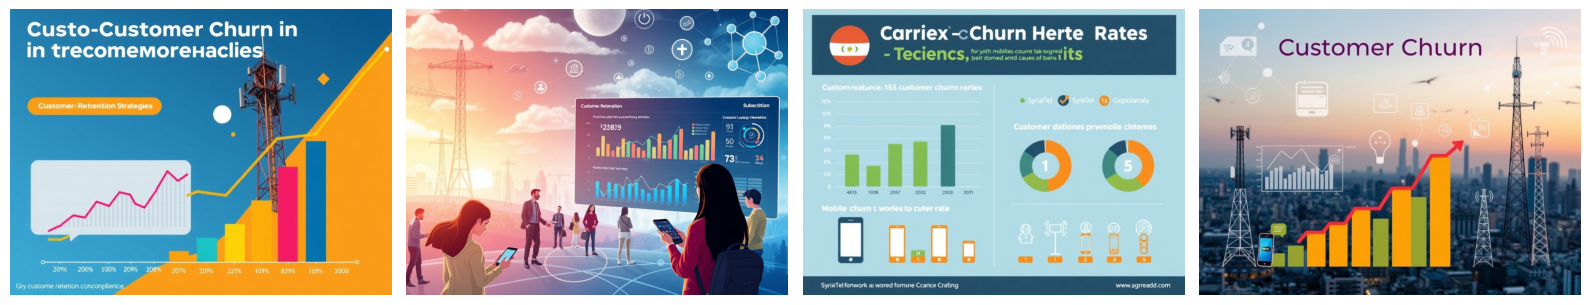

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_paths = [
    'C:/Users/Cassio/Downloads/a_visual_represent_image_.jpg','C:/Users/Cassio/Downloads/a_futuristic_telec_image_.jpg','C:/Users/Cassio/Downloads/an_infographic_dep_image_.jpg','C:/Users/Cassio/Downloads/a_conceptual_image_image_.jpg'
]
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  
for ax, img_path in zip(axs, image_paths):
    img = mpimg.imread(img_path)  
    ax.imshow(img)
    ax.axis('off') 
plt.tight_layout()  
plt.show()

# Introduction:
Ce projet vise à développer un modèle prédictif pour déterminer si un client de SyrieTel, une entreprise de télécommunications, cessera d'utiliser ses services.

# Problème Commercial
Partie Prenante: L'opérateur téléphonique SyriaTel
### Problématique: 
L'entreprise souhaite réduire le taux de churn de ses clients. En identifiant les clients à risque de partir, elle peut mettre en place des mesures proactives pour les retenir, telles que des offres spéciales ou un meilleur service client.

# Objectifs:
- Prédire le taux de désabonnement des clients
- Identifier les clients à risque afin de réduire le taux de désabonnement et d'améliorer la fidélisation

# Methodologie
- Chargement du Dataset
- Comprendre la structure des données
### Analyse descriptive
- Explorer les données pour identifier les problèmes de qualité des données et les modèles
- Nettoyage des données
- Gérer les colonnes indésirables
- Gérer les valeurs manquantes
- Gérer les valeurs aberrantes et non naturelles
- EDA (Exploratory Data Analytics) Utilisation de la visualisation des données
- EDA en utilisant des statistiques
### Analyse diagnostique
- Prétraitement des données
- Etc.
### Analyse predictive
- Diraction des données en train et ensembles de test
- Appliquer ML pour construire un modèle prédictif
- Utilisez un algorithme ML et le train à l'aide de trains
- Analyse des performances 
- Etc.
### Analyse prescriptive
- Ce qu'il faut faire pour retenir les clients
- Strategies a mettre en place


 

# Analyse descriptives 

In [2]:
# Importer les bibliotheques necessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import missingno as msno
from scipy.stats import pearsonr, spearmanr, fisher_exact, chi2_contingency
#y, pointbiserialr # to calculate correlation and p-value etc.
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bigml.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Overview and Understand the Dataset

In [4]:
# Nombre de lignes et colonnes
df.shape

(3333, 21)

In [5]:
# voyons les premieres lignes
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Voyons les dernieres lignes
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
# Voyons un echantillon du dataset
df.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2844,NH,161,415,349-4397,no,no,0,173.4,100,29.48,...,74,18.16,141.5,69,6.37,11.5,4,3.11,1,False
1270,MT,74,415,335-9066,no,no,0,162.7,102,27.66,...,105,24.82,183.3,80,8.25,8.7,6,2.35,0,False
3309,VT,100,408,340-9449,yes,no,0,219.4,112,37.30,...,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
1017,GA,132,415,418-3426,no,no,0,176.7,132,30.04,...,80,20.75,176.3,120,7.93,9.1,4,2.46,2,False
1332,ID,95,415,393-2220,no,yes,32,247.0,109,41.99,...,91,10.68,226.5,90,10.19,10.5,4,2.84,3,False


In [8]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
# Information sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
df.describe(include="all")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,400-4344,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [11]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

<Axes: >

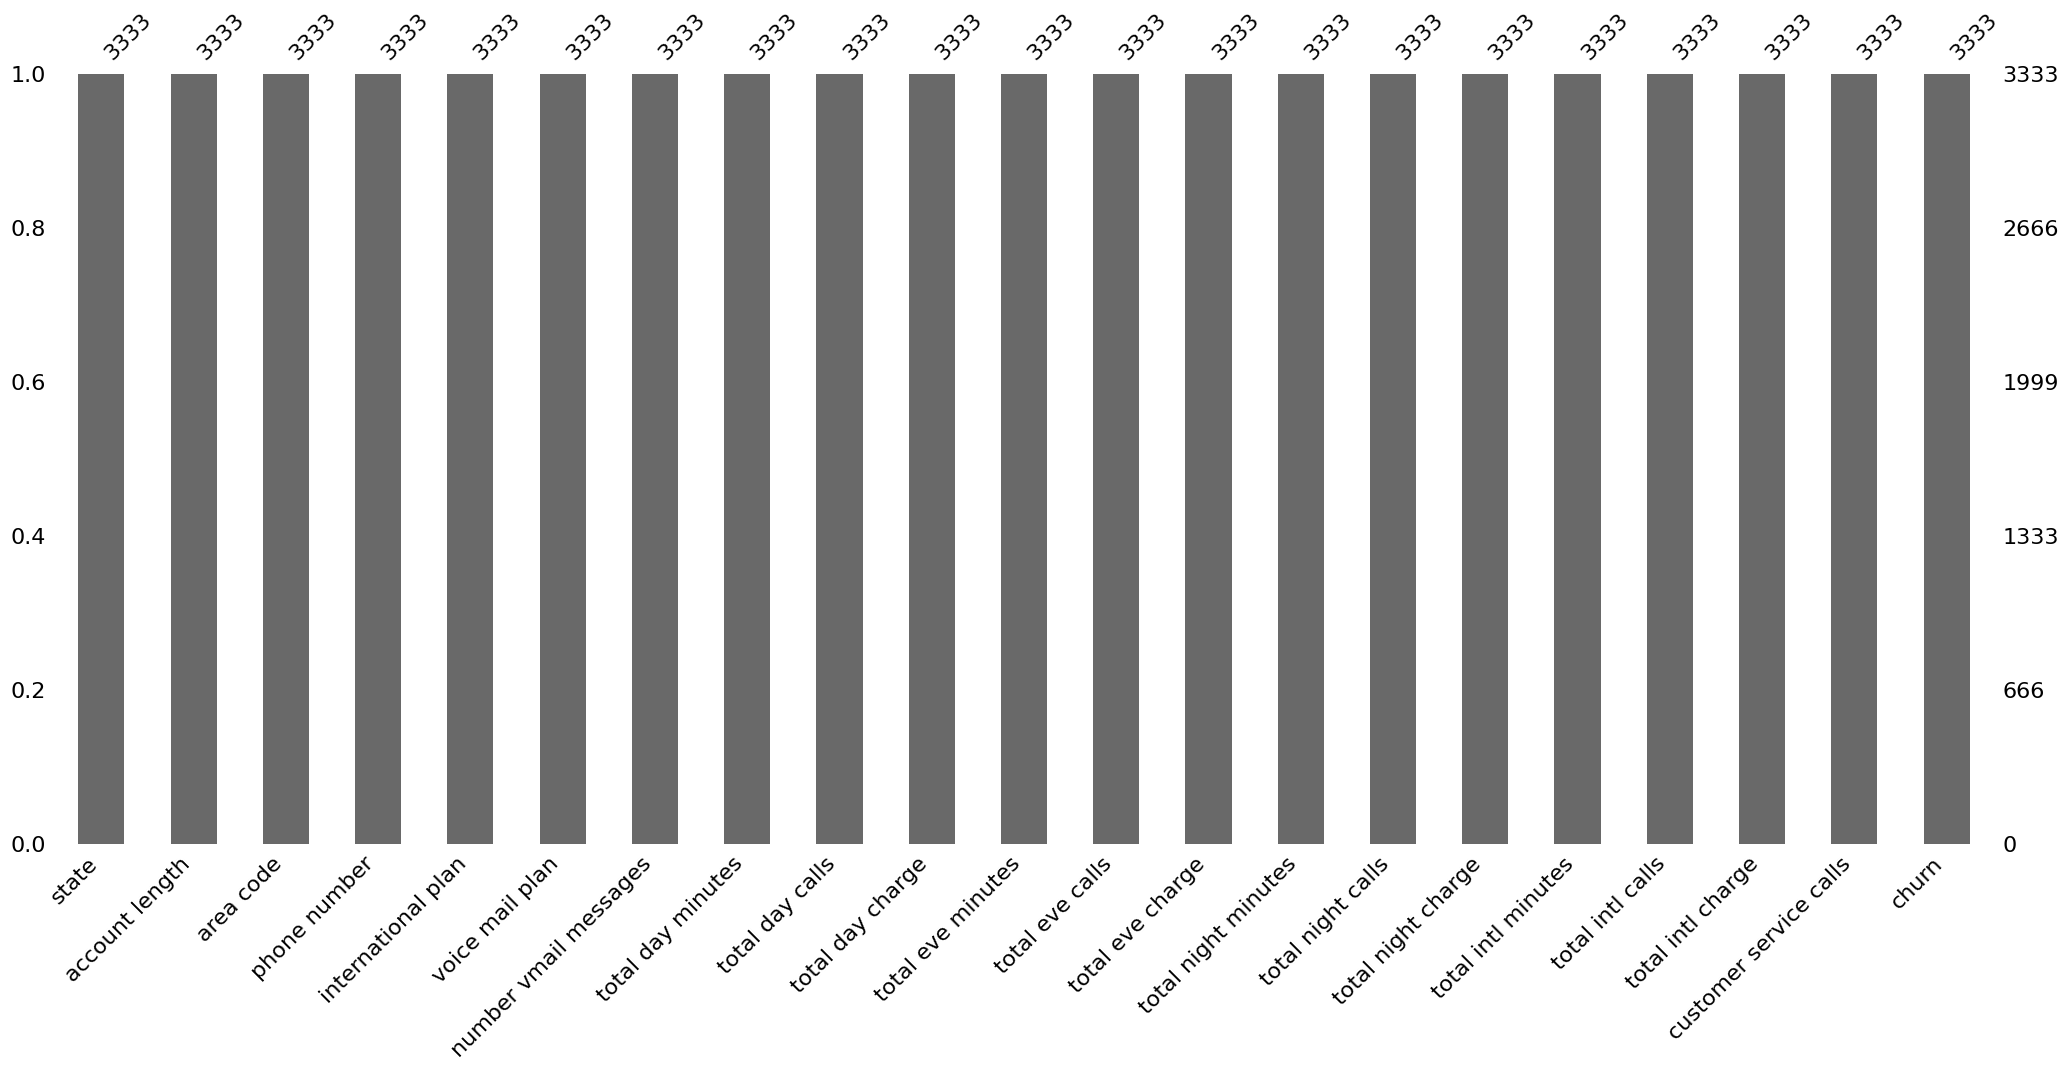

In [12]:
# Graphic pour voir s'il y a des valeurs nulles
msno.bar(df)

### Resumé de l'appercu du Dataset

- Notre Dataset contient 3333 lignes et 21 colonnes ou variables
- Aucune valeur manquante observée
- La variable cible est churn . Il s’agit d’une variable binaire, nous allons donc résoudre un problème de classification.
- Certaines colonnes qui devraient etre int64 sont object, comme la variable phone number

# Data Cleaning
- Apres avoir fait des inspection sur le fichier ainsi que son contenu comme les differents varibles, on trouve que notre Dataset est quasiment propre pour l'etude. On n'a qu'a a faire quelques petits arrangement ou nettoyage
- Supprimez le numéro de téléphone, car il n’aide pas à prédire le taux de désabonnement.

In [13]:
# Convertir la variable phone number en numeric
# Supprimer les caractères non numériques
df["phone number"] = df["phone number"].str.replace(r'\D', '', regex=True)

# Convertir en entier
df["phone number"] = df["phone number"].astype(int)

In [14]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [16]:
# Regarder s'il y des valeurs doubles
print(df.duplicated().sum())

0


Aucune rangée duliquée observée

In [17]:
# Verifier s'il y a des valeurs aberrantes
# Sélectionner uniquement les colonnes numériques 
numeric_df = df.select_dtypes(include=['number'])

print("\nSkewness des colonnes numériques:")
print(numeric_df.skew())


Skewness des colonnes numériques:
account length            0.096606
area code                 1.126823
phone number              0.009732
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64


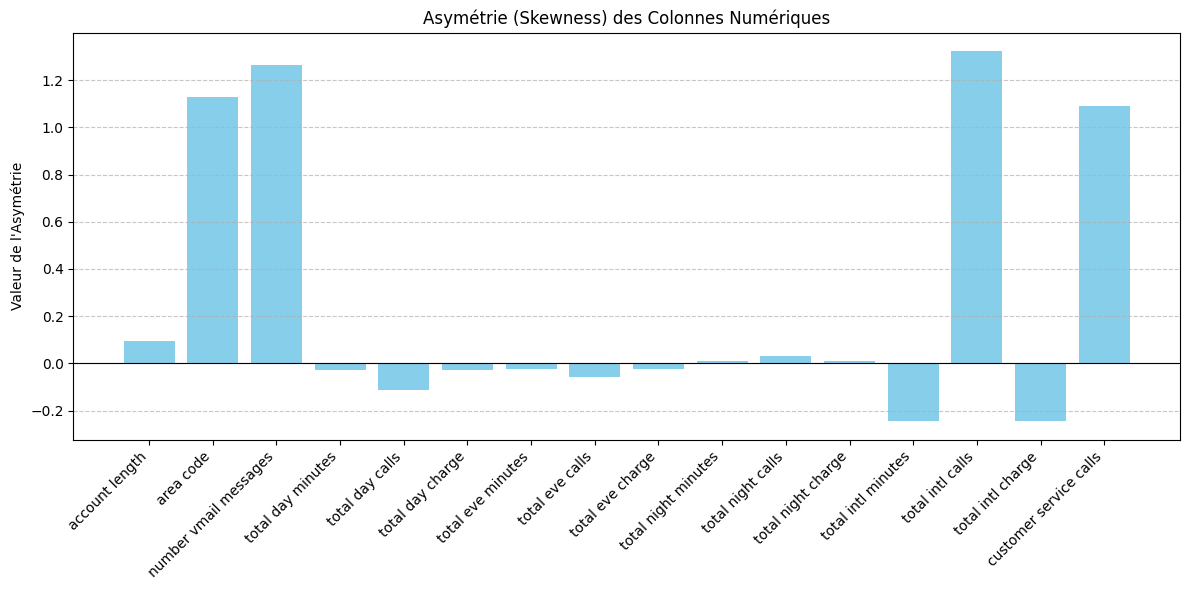

In [18]:
data = {
    'account length': [0.096606],
    'area code': [1.126823],
    'number vmail messages': [1.264824],
    'total day minutes': [-0.029077],
    'total day calls': [-0.111787],
    'total day charge': [-0.029083],
    'total eve minutes': [-0.023877],
    'total eve calls': [-0.055563],
    'total eve charge': [-0.023858],
    'total night minutes': [0.008921],
    'total night calls': [0.032500],
    'total night charge': [0.008886],
    'total intl minutes': [-0.245136],
    'total intl calls': [1.321478],
    'total intl charge': [-0.245287],
    'customer service calls': [1.091359],
}

# Création du DataFrame
df_skewness = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_skewness.columns, df_skewness.iloc[0], color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('Asymétrie (Skewness) des Colonnes Numériques')
plt.ylabel('Valeur de l\'Asymétrie')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Interprétation de l'Asymétrie
#### account length: 0.0976
- Légèrement symétrique, indiquant une distribution normale.
#### area code: 1.1268
- Asymétrie positive, suggérant qu'il y a plus de valeurs dans la partie inférieure (zone basse) de la distribution.
#### number vmail messages: 1.2648
- Asymétrie positive marquée, indiquant que plusieurs clients n'ont pas de messages vocaux, tandis que quelques-uns en ont beaucoup.
#### total day minutes: -0.0291
- Près de la symétrie, indiquant une distribution équilibrée.
#### total day calls: -0.1118
- Légèrement asymétrique vers la gauche, indiquant que la majorité des clients passent un nombre modéré d'appels.
#### total day charge: -0.0291
- Près de la symétrie, similaire à total day minutes.
#### total eve minutes: -0.0239
- Près de la symétrie, indiquant une distribution équilibrée.
#### total eve calls: -0.0556
- Légèrement asymétrique vers la gauche, indiquant que la majorité des clients passent un nombre modéré d'appels.
#### total eve charge: -0.0239
- Près de la symétrie, semblable à total eve minutes.
#### total night minutes: 0.0089
- Près de la symétrie, indiquant une distribution équilibrée.
#### total night calls: 0.0325
- Près de la symétrie, indiquant une distribution équilibrée.
#### total night charge: 0.0089
- Près de la symétrie, semblable à total night minutes.
#### total intl minutes: -0.2451
- Asymétrie négative, indiquant que la majorité des clients passent peu ou pas de temps en appels internationaux.
#### total intl calls: 1.3215
- Asymétrie positive marquée, indiquant que beaucoup de clients n'appellent pas à l'international, mais quelques-uns en font beaucoup.
#### total intl charge: -0.2453
- Asymétrie négative, similaire à total intl minutes.
#### customer service calls: 1.0914
- Asymétrie positive, indiquant que beaucoup de clients n'appellent pas le service client, tandis que quelques-uns en appellent fréquemment.

# Analyse diagnostique

## Identification des Variables Clés
### Variables à Analyser
- Churn (cible)
- Durée du compte (account length)
- Utilisation des minutes (total day minutes, total evening minutes, total night minutes)
- Nombre d'appels au service client (customer service calls)
- Plans souscrits (international plan, voice mail plan)

### Regard sur la variable cible 

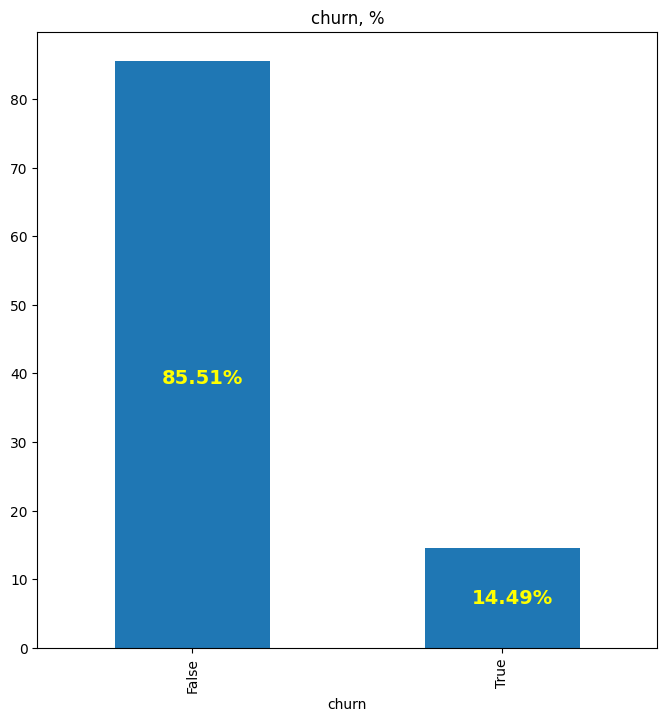

In [19]:
# Regard sur la variable cible 
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'yellow', weight = 'bold', size = 14)

churn est la variable cible pour la classification, elle indique si un client est fidèle ou partant. False indique que le client reste et True indique le client se desabonne. A travers ce graphique, nous pouvons constater que 85.51 % des clients restent et 14.49 % se desabonnent sur le service.

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


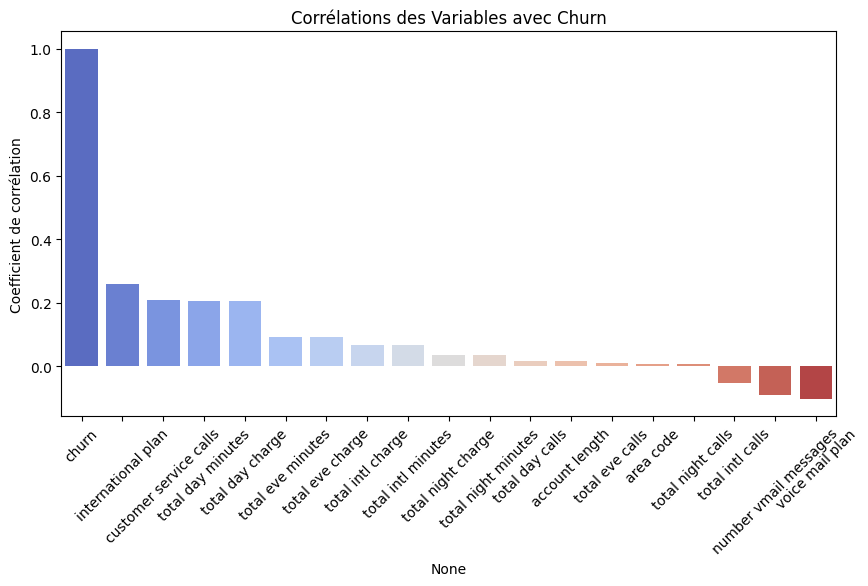

In [20]:
df = pd.read_csv('bigml.csv')

# Convertir les colonnes catégorielles en numériques
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})

# Supprimer les colonnes non numériques
df_cleaned = df.drop(['phone number', 'state'], axis=1)

df_cleaned.isnull().sum()

# Remplacer les NaN par la moyenne ou supprimer les lignes
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

df_cleaned.isnull().sum()

# Calculer les corrélations
correlation_with_churn = df_cleaned.corr()['churn'].sort_values(ascending=False)
print(correlation_with_churn)

# Visualisation des corrélations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='coolwarm')
plt.title("Corrélations des Variables avec Churn")
plt.ylabel("Coefficient de corrélation")
plt.xticks(rotation=45)
plt.show()

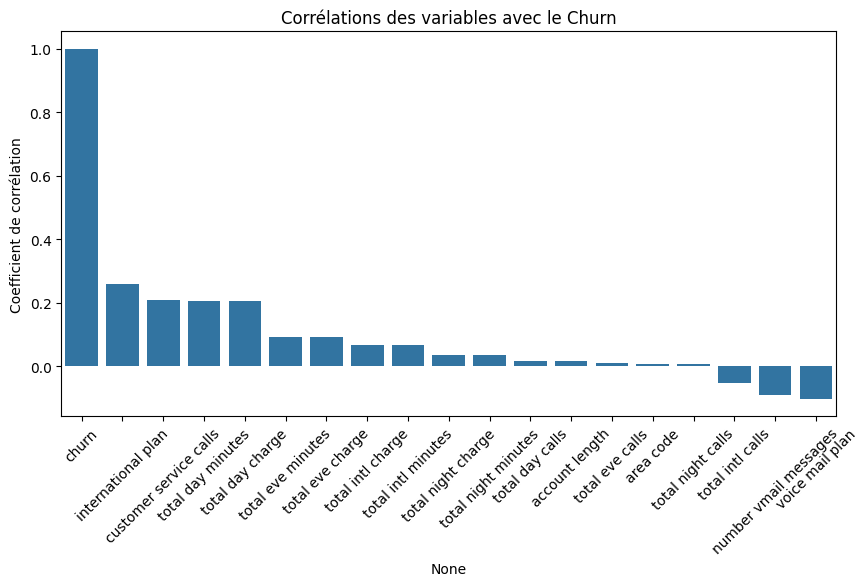

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values)
plt.title("Corrélations des variables avec le Churn")
plt.xticks(rotation=45)
plt.ylabel("Coefficient de corrélation")
plt.show()

#### Interpretation
- Les variables les plus informatives pour la prédiction du churn sont probablement:
churn (automatique, à éviter dans les modèles de prédiction)
internationales et appels au téléphone (international plan, customer service calls, total day minutes, total day calls)
- Pour un modèle de classification (prévoir churn), on peut:
- utiliser ces variables comme features principales
tester des méthodes qui gèrent bien les corrélations et les interactions (logistic regression, random forest, etc.)

In [22]:
# Clients ayant churn
churned_clients = df[df['churn'] == 1]

# Statistiques descriptives des clients churn
print(churned_clients.describe())

       account length   area code  international plan  voice mail plan  \
count      483.000000  483.000000          483.000000       483.000000   
mean       102.664596  437.817805            0.283644         0.165631   
std         39.467820   42.792270            0.451233         0.372135   
min          1.000000  408.000000            0.000000         0.000000   
25%         76.000000  408.000000            0.000000         0.000000   
50%        103.000000  415.000000            0.000000         0.000000   
75%        127.000000  510.000000            1.000000         0.000000   
max        225.000000  510.000000            1.000000         1.000000   

       number vmail messages  total day minutes  total day calls  \
count             483.000000         483.000000       483.000000   
mean                5.115942         206.914079       101.335404   
std                11.860138          68.997792        21.582307   
min                 0.000000           0.000000         0.000

In [23]:
# Comparaison des moyennes entre clients churn et non-churn
comparison = df_cleaned.groupby('churn').mean()
print(comparison)

       account length   area code  international plan  voice mail plan  \
churn                                                                    
0          100.793684  437.074737            0.065263         0.295439   
1          102.664596  437.817805            0.283644         0.165631   

       number vmail messages  total day minutes  total day calls  \
churn                                                              
0                   8.604561         175.175754       100.283158   
1                   5.115942         206.914079       101.335404   

       total day charge  total eve minutes  total eve calls  total eve charge  \
churn                                                                           
0             29.780421         199.043298       100.038596         16.918909   
1             35.175921         212.410145       100.561077         18.054969   

       total night minutes  total night calls  total night charge  \
churn                               

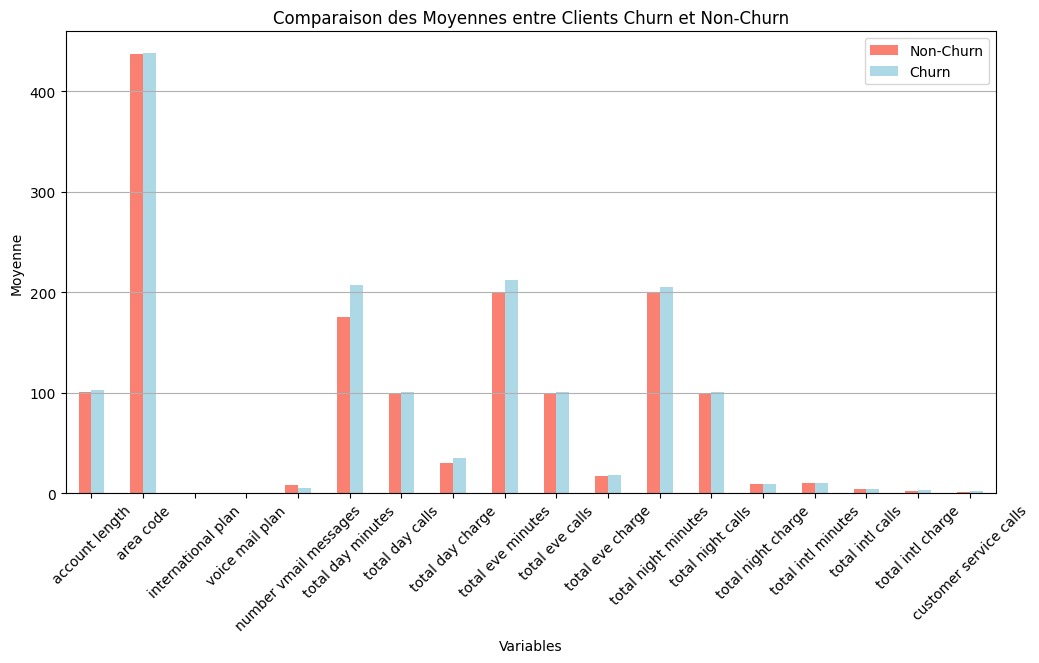

In [24]:
# Visualisation des moyennes
comparison.T.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'])
plt.title('Comparaison des Moyennes entre Clients Churn et Non-Churn')
plt.ylabel('Moyenne')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.legend(['Non-Churn', 'Churn'])
plt.grid(axis='y')
plt.show()

#### Interpretation
- Les variables les plus informatives pour discriminer churn vs non-churn pourraient être:
- les métriques d’utilisation téléphonique (minutes et appels par période)
- les plans (international/voice mail) qui peuvent influencer le churn
- Certaines variables semblent peu discriminantes (moyennes similaires entre les groupes).

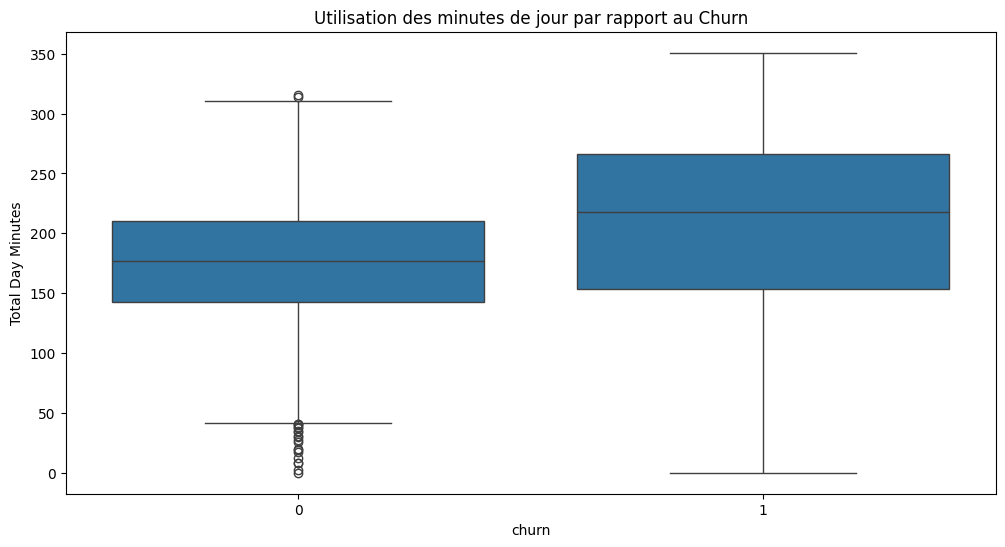

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='churn', y='total day minutes')
plt.title("Utilisation des minutes de jour par rapport au Churn")
plt.ylabel("Total Day Minutes")
plt.show()

##### Interpretation:
- Non-Churn: les valeurs des minutes journalières varient majoritairement entre ~120 et ~260 minutes, avec des médianes autour de 180 minutes. Une dispersion modérée.
- Churn: distribution des minutes journalières beaucoup plus large, allant de ~0 à ~350 minutes, indiquant une plus grande variabilité chez les clients qui partent.
- Médiane et dispersion:
- La médiane pour Non-Churn se situe probablement autour de 170–190 minutes.
- Pour Churn, la médiane est plus élevée et la dispersion est plus grande, ce qui peut suggérer que certains clients churn ont une utilisation très élevée, mais aussi des valeurs faibles.
- Points OUTLIERS visibles principalement dans la catégorie churn (valeurs élevées autour de 300–350 minutes).

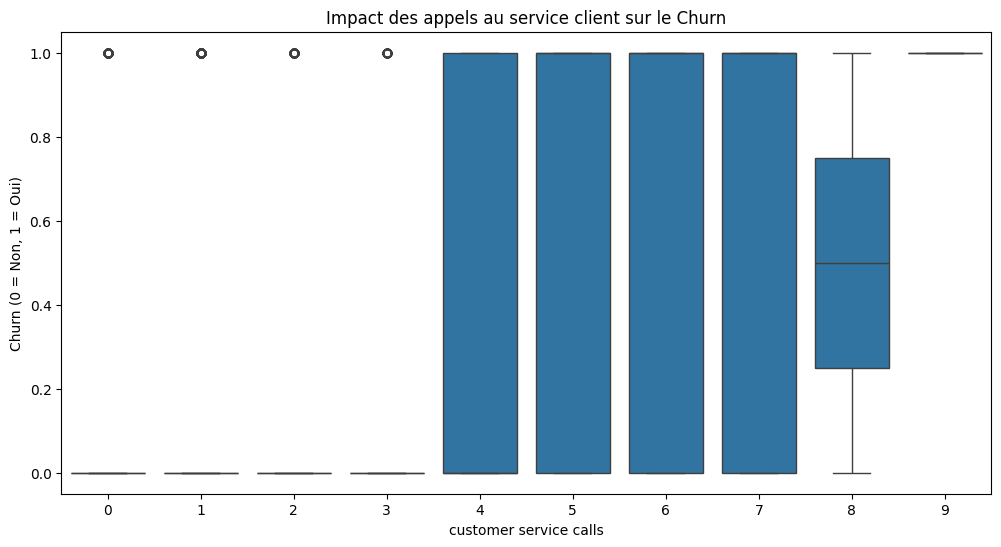

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer service calls', y='churn')
plt.title("Impact des appels au service client sur le Churn")
plt.ylabel("Churn (0 = Non, 1 = Oui)")
plt.show()

#### Observation:
- Les valeurs churn autour de 0 et 1 sont codées comme des boîtes pour chaque nombre d’appels.
- On observe une concentration de churn élevé (1) pour un grand nombre d’appels, et une faible pour peu d’appels.
- Pour les appels plus élevés (8-9), on voit aussi des cas de churn, mais la densité est plus faible dans l’ensemble.
- Globalement, plus le nombre d’appels est élevé, plus la probabilité de churn semble augmenter, mais il existe aussi des cas de churn même avec peu d’appels.

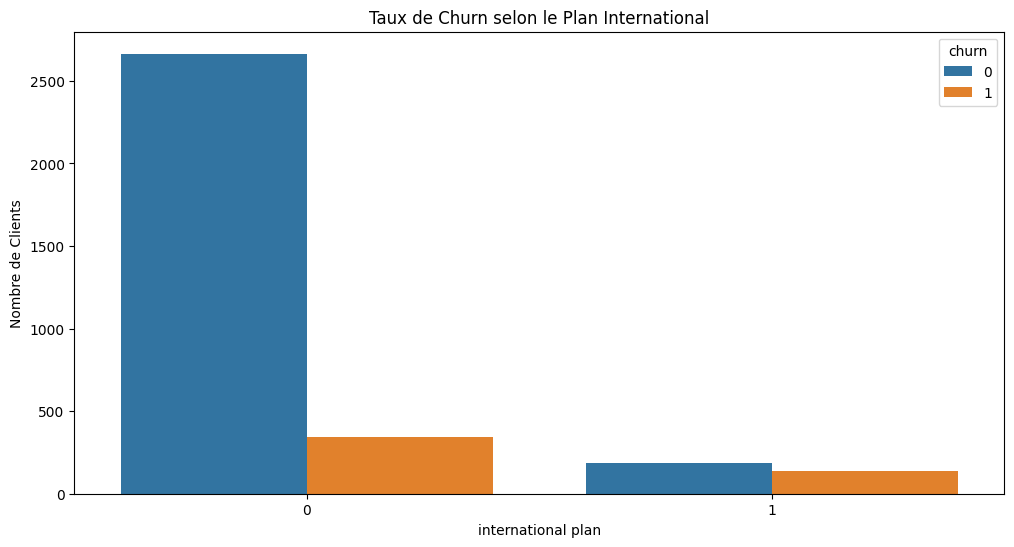

In [27]:
# Taux de churn en fonction des plans
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='international plan', hue='churn')
plt.title("Taux de Churn selon le Plan International")
plt.ylabel("Nombre de Clients")
plt.show()

#### Obervation
Pour le plan international:
- Non-Churn (0) compte environ 2700 clients.
- Churn (1) compte environ 350 clients.
- Cela indique que les clients avec un plan international ont un taux de churn plus élevé que ceux sans plan international.

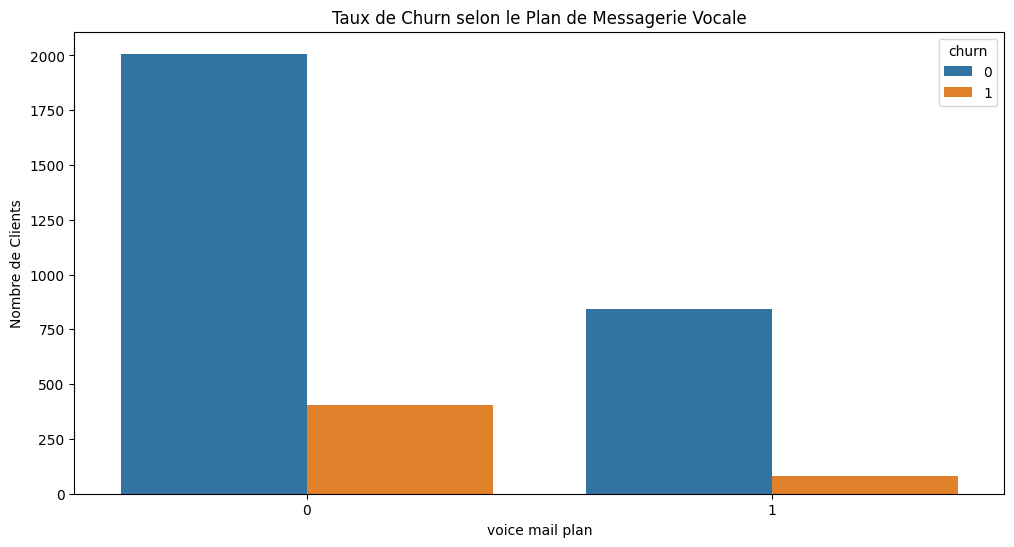

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='voice mail plan', hue='churn')
plt.title("Taux de Churn selon le Plan de Messagerie Vocale")
plt.ylabel("Nombre de Clients")
plt.show()

#### Obervation:
Pour le plan 0 (pas de plan):
- Non-Churn (0): environ 2000 clients
- Churn (1): environ 400 clients
Pour le plan 1 (avec plan):
- Non-Churn (0): environ 850 clients
- Churn (1): environ 90 clients
###### Le churn est nettement plus élevé chez les clients sans plan vocal que chez ceux avec plan, mais les deux catégories montrent des taux de churn plus élevés dans le groupe 0 globalement.

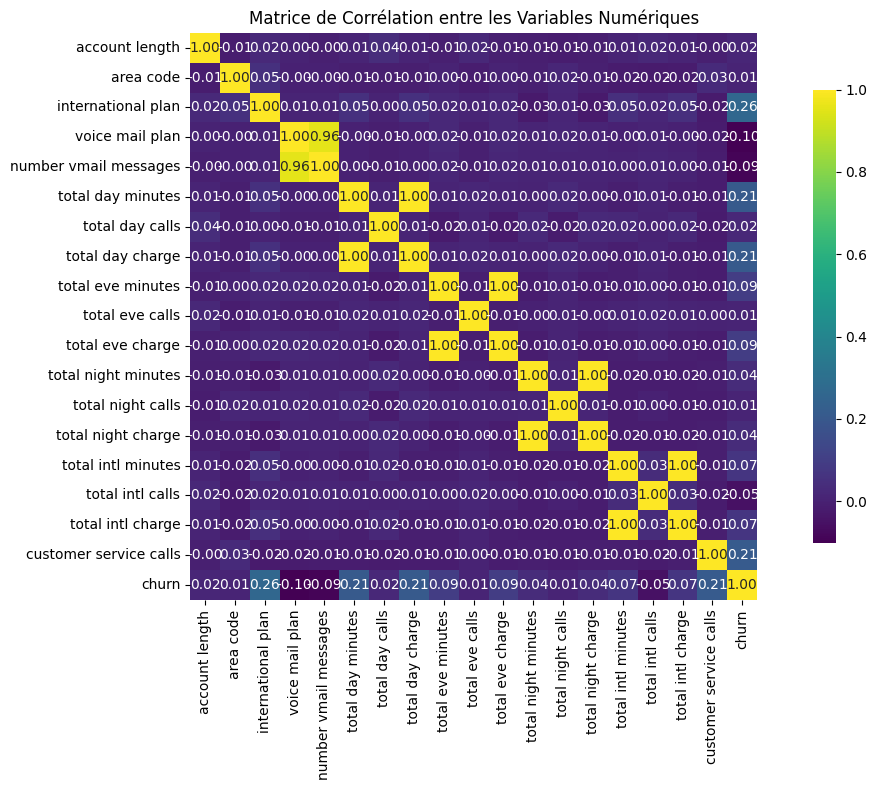

In [29]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation entre les Variables Numériques')
plt.tight_layout()
plt.show()

#### Observation:
- Diagonale principale: les valeurs sont toutes égales à 1 (corrélation parfaite avec soi-même).
- Corrélations élevées et positives (jaune):
- Certaines paires montrent des corrélations élevées, notamment:
"account length" avec son homologue proche et d’autres métriques d’utilisation.
"total day minutes" et "total day calls", "total eve minutes" avec d’autres mesures liées à la journée/soirée.
- Ces corrélations positives fortes suggèrent que les métriques d’usage (minutes, appels, charges) ont tendance à varier ensemble.
- Corrélations faibles ou négatives (violet/pourpre):
- Beaucoup de paires montrent des corrélations faibles près de zéro.
- Peu de corrélations négatives marquées apparaissent, indiquant peu de relations inverse marquées entre les variables.

### Répartition des clients par État

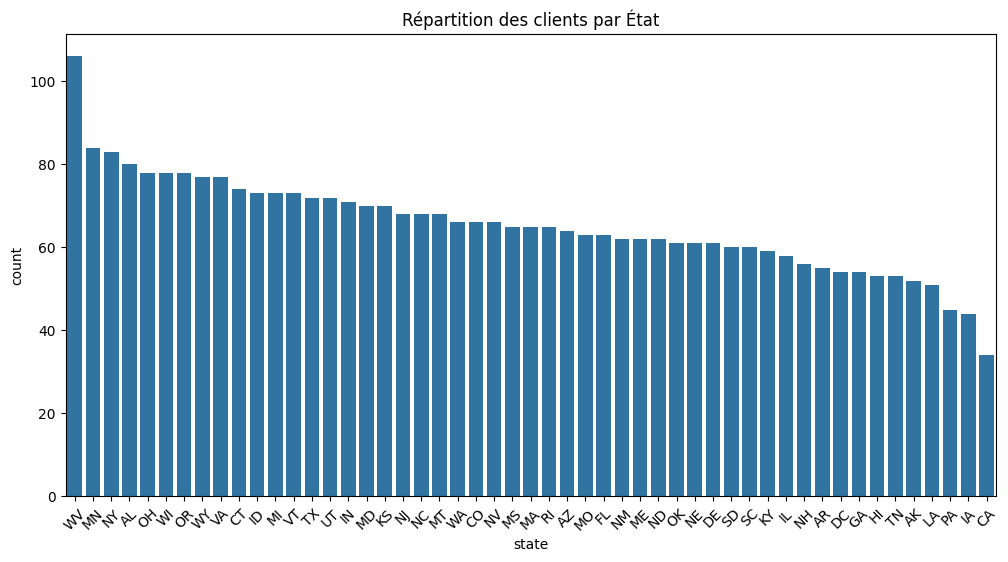

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title("Répartition des clients par État")
plt.xticks(rotation=45)
plt.show()

#### Observation:
- L’État “WW” affiche le plus grand nombre de clients (~110).
- On observe une diminution progressive du nombre de clients au fur et à mesure que l’indice de l’État augmente.
- Quelques États au milieu montrent des counts relativement similaires (~70–80), puis la courbe continue de baisser.
- À la fin de la liste, certains États affichent des comptes très bas (~40–50).

Top 10 états avec le plus de clients :
state
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
Name: count, dtype: int64


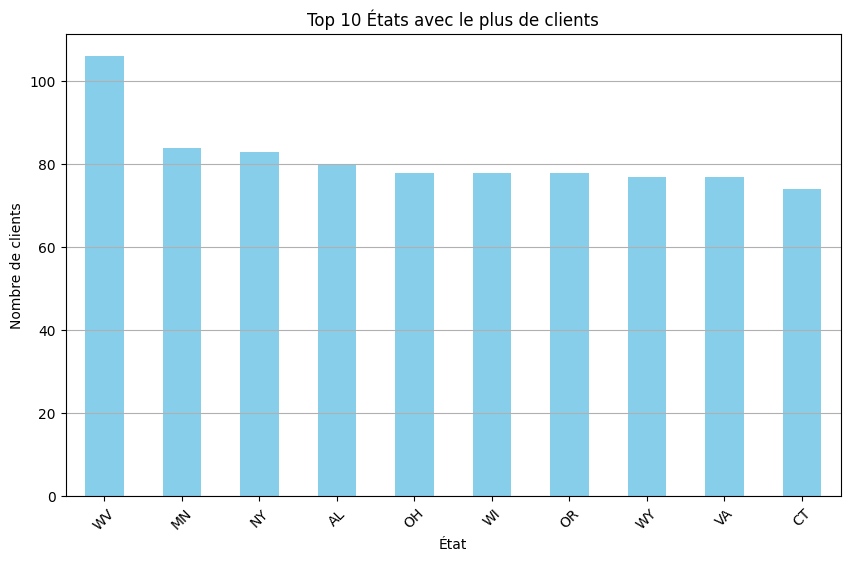

In [31]:
# Supprimer les espaces autour des noms de colonnes
df.columns = df.columns.str.strip()

# Compter le nombre de clients par état
clients_per_state = df['state'].value_counts()

# Obtenir les 10 états avec le plus de clients
top_10_states = clients_per_state.nlargest(10)

# Afficher les résultats
print("Top 10 états avec le plus de clients :")
print(top_10_states)

# Graphique à barres
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 États avec le plus de clients')
plt.xlabel('État')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Observation: WW est clairement le principal contributeur de clients parmi ces États.
- Les autres États forment un groupe relativement proche les uns des autres, avec une légère diminution des counts.
- Si l’objectif est la segmentation ou les campagnes marketing:
- Prioriser WW pour les initiatives à grand impact.
- WW est clairement le principal contributeur de clients parmi ces États.
- Les autres États forment un groupe relativement proche les uns des autres, avec une légère diminution des counts.
- Si l’objectif est la segmentation ou les campagnes marketing:
- Prioriser WW pour les initiatives à grand impact.

state
WV    10116
MN     8532
NY     8358
VA     8157
WY     8142
OH     7968
OR     7891
AL     7842
WI     7713
ID     7628
Name: account length, dtype: int64


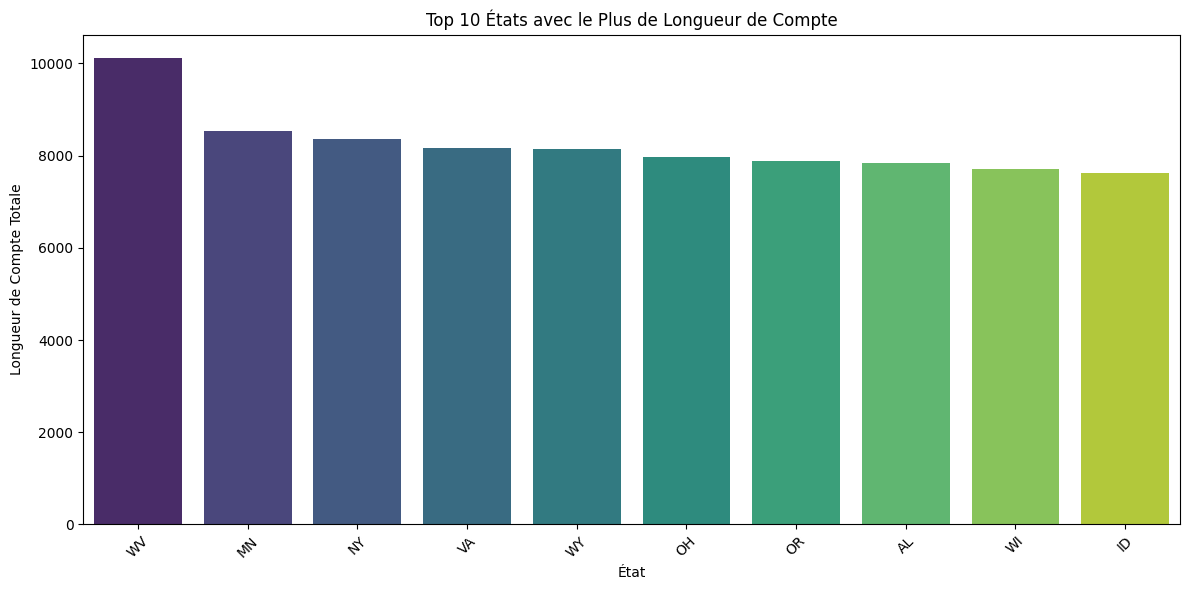

In [32]:
# Regrouper par état et sommer les longueurs de compte
top_states = df.groupby('state')['account length'].sum()

# Trier les états par longueur de compte et obtenir les 10 premiers
top_10_states = top_states.sort_values(ascending=False).head(10)

# Afficher les résultats
print(top_10_states)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='viridis')
plt.title('Top 10 États avec le Plus de Longueur de Compte')
plt.xlabel('État')
plt.ylabel('Longueur de Compte Totale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation:
- L’État WW affiche la valeur maximale, environ 10 100.
- Les autres États suivent une tendance décroissante mais restent à des niveaux similaires, autour de 8 300 à 7 700.
- Visualisation montre une distribution relativement monotone décroissante des comptes totaux entre les États.
- WW est nettement le principal contributeur du total des comptes.
- Les autres États ont des niveaux proches les uns des autres; peu d’écart entre MN, NY, VA, WY, OH, OR, AL, WI, ID

### Durée moyenne du compte

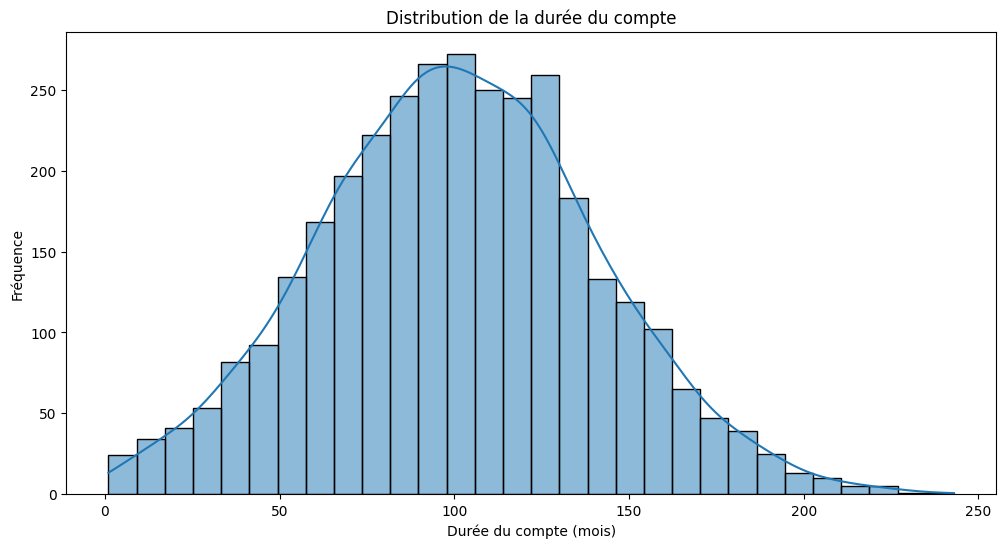

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df['account length'], bins=30, kde=True)
plt.title("Distribution de la durée du compte")
plt.xlabel("Durée du compte (mois)")
plt.ylabel("Fréquence")
plt.show()

#### Observation:
- Mode ou pic: la fréquence est la plus élevée autour d’environ 90 à 110 mois (3,5 à 9,5 ans), ce qui indique que la majorité des comptes sont en moyenne longue durée.
- Queue droite: on observe des comptes avec des durées beaucoup plus longues, jusqu’à environ 240 mois (20 ans), bien que leur fréquence soit faible.
- Déclin progressif: après le pic, la fréquence diminue progressivement à mesure que la durée augmente.
- Les clients restent généralement assez longtemps (longue durée moyenne), mais il existe une proportion non négligeable qui se désengage plus tôt.
- La concentration autour de 90–110 mois peut refléter une valeur ou un bénéfice perçu qui pousse les clients à rester plusieurs années.
- La longue queue vers le long terme peut correspondre à des segments fidèles ou des clients historiques.

### Utilisation des services

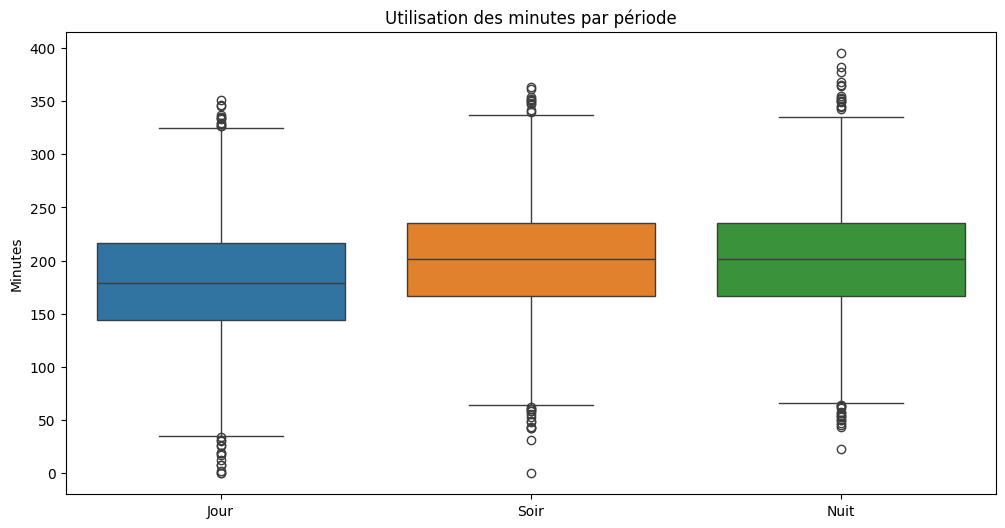

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['total day minutes', 'total eve minutes', 'total night minutes']])
plt.title("Utilisation des minutes par période")
plt.ylabel("Minutes")
plt.xticks([0, 1, 2], ['Jour', 'Soir', 'Nuit'])
plt.show()

#### Observation
1- Jour:
- Distribution plus large avec un maximum notable autour de 320–330 minutes.
- Médiane vers environ 180 minutes.
- Présence de valeurs faibles (quelques minutes) et quelques outliers autour de 320+.
2- Soir:
- Usage globalement plus élevé que le jour, médiane autour de 200 minutes.
- Palette plus étendue avec des valeurs allant jusqu’à environ 340–360 minutes dans les extrémités supérieures.
- Quelques valeurs proches de zéro, indiquant des périodes très peu utilisées pour certains jours.
3- Nuit:
- Moins d’utilisation que le soir, mais toujours notable.
- Médiane autour de 200 minutes (similaire au soir) avec une distribution allant de 20 à 350–360 minutes.
- Outliers élevés vers 330–360 minutes.

Le soir et la nuit montrent des usages plus élevés que le jour, ce qui peut refléter une utilisation accrue du service à ces moments.
Les distributions sont relativement symétriques autour de leur médiane, avec des queues vers le haut (outliers positifs), surtout pour le soir et la nuit.
En pratique, ces insights peuvent aider à:
Planifier des ressources réseau ou support en période de forte utilisation (soir/nuit).
Adapter les offres tarifaires ou les campagnes marketing en fonction des heures d’usage.
Détecter des comportements anormaux via les outliers.

### Taux de résiliation (Churn Rate)

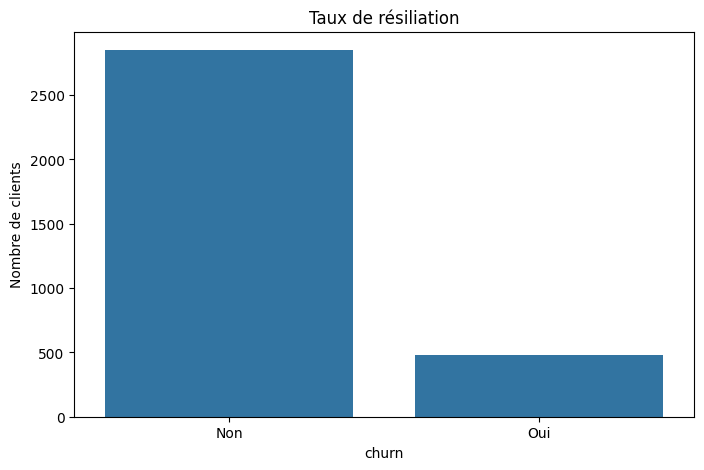

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='churn')
plt.title("Taux de résiliation")
plt.xticks([0, 1], ['Non', 'Oui'])
plt.ylabel("Nombre de clients")
plt.show()

#### Observation:
- Taux de résiliation relativement faible indique une forte rétention de la clientèle.
Actions possibles:
- Maintenir et renforcer les facteurs de fidélisation (qualité du service, tarifs, support client).
- Analyser les raisons des résiliations pour convertir les clients potentiellement à risque en clients fidèles.

In [36]:
# Analyse des minutes par période
for period in ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']:
    print(f"\nStatistiques pour {period} :")
    print(df[period].describe())


Statistiques pour total day minutes :
count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64

Statistiques pour total eve minutes :
count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: total eve minutes, dtype: float64

Statistiques pour total night minutes :
count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: total night minutes, dtype: float64

Statistiques pour total intl minutes :
count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: total intl minutes, dtype: float64


#### Observation:
1. Total Day Minutes
- Moyenne : 179,78 minutes, ce qui indique que, en moyenne, les clients utilisent près de 3 heures par jour.
- Écart type : 54,47 minutes, suggérant une variabilité modérée dans l'utilisation quotidienne.
- Min / Max : Les clients ont utilisé entre 0 et 350,8 minutes, ce qui indique que certains clients n'utilisent pas du tout leur téléphone pendant la journée, tandis que d'autres l'utilisent intensivement.
Quartiles :
- Le 25e percentile (143,7 minutes) indique que 25 % des clients utilisent moins de 143,7 minutes par jour.
- Le 75e percentile (216,4 minutes) montre que 75 % des clients utilisent moins de 216,4 minutes, ce qui signifie que les utilisateurs intensifs se situent dans la plage supérieure.

2. Total Eve Minutes
- Moyenne : 200,98 minutes, ce qui est légèrement plus élevé que l'utilisation durant la journée.
- Écart type : 50,71 minutes, indiquant une variabilité similaire à celle de l'utilisation quotidienne.
- Min / Max : Les valeurs vont de 0 à 363,7 minutes, avec une utilisation significative à des moments de pointe.
Quartiles :
- Le 25e percentile (166,6 minutes) et le 75e percentile (235,3 minutes) suggèrent que les utilisateurs ont tendance à parler plus longtemps en soirée.

3. Total Night Minutes
- Moyenne : 200,87 minutes, suggérant que l'utilisation nocturne est comparable à celle de la soirée.
- Écart type : 50,57 minutes, ce qui indique également une variabilité similaire.
- Min / Max : L'utilisation va de 23,2 à 395 minutes, ce qui montre que certains clients utilisent beaucoup leur téléphone la nuit.
-Quartiles : Les quartiles sont similaires à ceux des minutes de soirée, indiquant une tendance à une utilisation élevée la nuit.

4. Total Intl Minutes
- Moyenne : 10,24 minutes, ce qui est nettement inférieur aux autres périodes, suggérant que les appels internationaux sont beaucoup moins fréquents.
- Écart type : 2,79 minutes, ce qui indique une faible variabilité, car la plupart des clients passent peu de temps en appel international.
- Min / Max : Les clients passent entre 0 et 20 minutes en appels internationaux, ce qui montre que peu d'entre eux utilisent cette fonctionnalité.
- Quartiles : Le quartile supérieur (12,1 minutes) montre que même parmi ceux qui passent des appels internationaux, l'utilisation reste limitée.

#### En somme: 
Les minutes de jour, de soirée et de nuit sont relativement élevées, ce qui indique un usage intensif du téléphone.
Les appels internationaux sont beaucoup moins courants, ce qui peut refléter une préférence pour les communications locales ou un coût élevé associé aux appels internationaux.
Les tendances d'utilisation montrent que les clients préfèrent utiliser leur téléphone pendant la journée et le soir, avec une utilisation nocturne également significative.

In [37]:
# Analyse des appels au service client
print("\nStatistiques sur les appels au service client :")
print(df['customer service calls'].describe())



Statistiques sur les appels au service client :
count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


In [38]:
# Proportion de clients avec messagerie vocale
proportion_voice_mail_plan = df['voice mail plan'].value_counts(normalize=True) * 100
print("\nProportion de clients avec plan de messagerie vocale :")
print(proportion_voice_mail_plan)


Proportion de clients avec plan de messagerie vocale :
voice mail plan
0    72.337234
1    27.662766
Name: proportion, dtype: float64


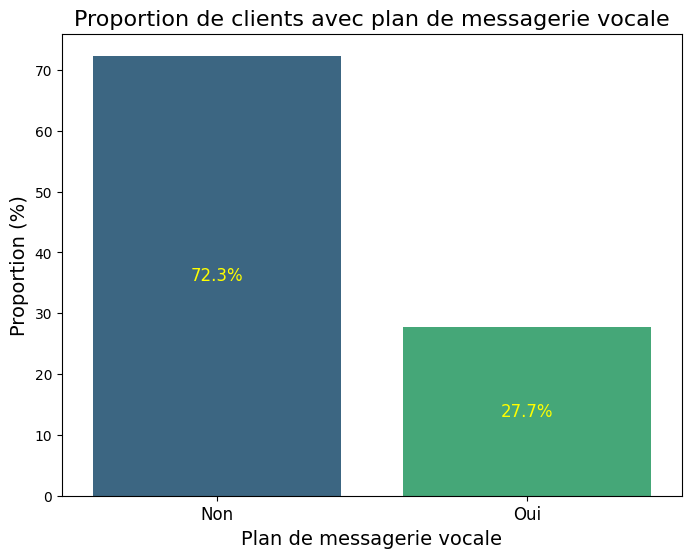

In [39]:
# Calculer la proportion de clients avec plan de messagerie vocale
proportion_voice_mail_plan = df['voice mail plan'].value_counts(normalize=True) * 100

# Créer un graphique à barres
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=proportion_voice_mail_plan.index, y=proportion_voice_mail_plan.values, palette='viridis')

# Ajouter des étiquettes et un titre
plt.title('Proportion de clients avec plan de messagerie vocale', fontsize=16)
plt.xlabel('Plan de messagerie vocale', fontsize=14)
plt.ylabel('Proportion (%)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'], fontsize=12)

# Afficher le pourcentage 
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height / 2), 
                ha='center', va='center', fontsize=12, color='yellow')

# Afficher le graphique
plt.show()

#### Observation:
- La majorité des clients n’utilise pas de plan de messagerie vocale.
  ###### On peut:
- Étudier pourquoi le plan vocal est peu utilisé et si la fonctionnalité est sous-utilisée ou mal promue.
- Déployer des campagnes ciblées pour encourager l’activation du plan vocal, le cas échéant.

In [40]:
df['international plan'].value_counts()

international plan
0    3010
1     323
Name: count, dtype: int64

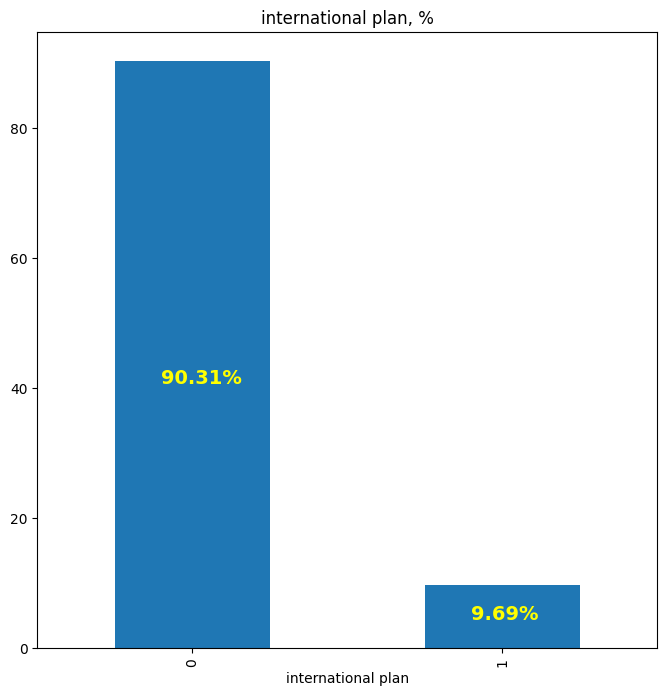

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df['international plan'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('international plan')
ax.set_title('international plan, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'yellow', weight = 'bold', size = 14)

#### Observation:
- Adoption faible du plan international parmi les clients.
- Potentiel pour des campagnes de promotion ou d’éducation sur les avantages du plan international.

# Analyse prédictive
- Préparation des données : Nettoyage et transformation des données
- Séparation des données : Division en ensembles d'entraînement et de test
- Sélection d'un modèle : Choisir et entraîner un modèle de classification
- Évaluation du modèle : Évaluer les performances du modèle
- Etc.

# Prétraitement

### Modélisation Prédictive

#### Préparation des Données

In [42]:
# Quoique deja fait lors des analyse ci-dessus, mais on juge necessaire
# Convertir les colonnes catégorielles en numériques
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})

# Supprimer les colonnes non numériques
df_cleaned = df.drop(['phone number', 'state'], axis=1)

# Vérification des valeurs manquantes
print(df_cleaned.isnull().sum())

account length               0
area code                    0
international plan        3333
voice mail plan           3333
number vmail messages        0
total day minutes            0
total day calls              0
total day charge             0
total eve minutes            0
total eve calls              0
total eve charge             0
total night minutes          0
total night calls            0
total night charge           0
total intl minutes           0
total intl calls             0
total intl charge            0
customer service calls       0
churn                     3333
dtype: int64


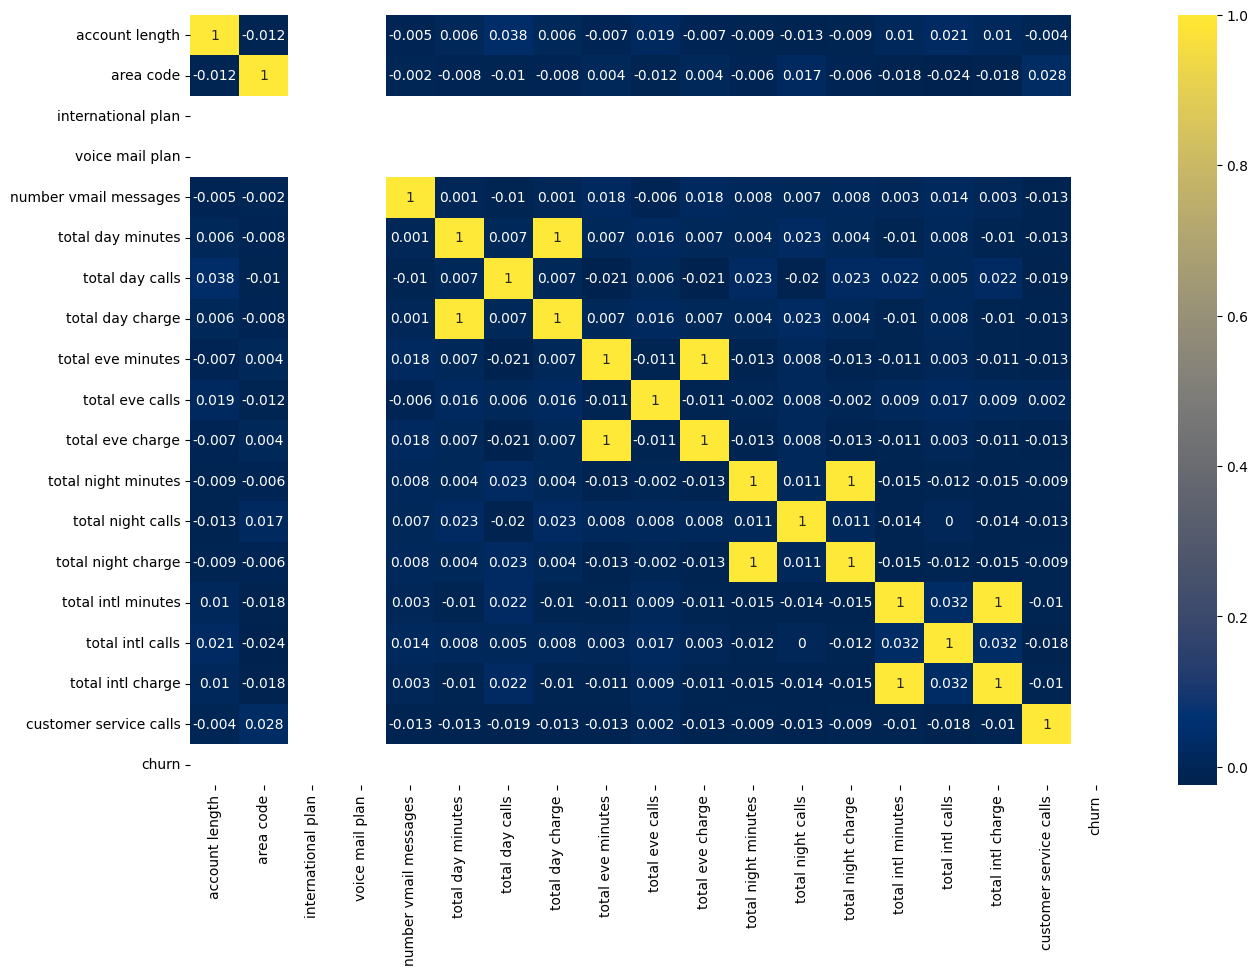

In [43]:
cor = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='cividis')
plt.show()

#### Observation:
1. Certaines paires présentent des corrélations positives fortes (zones jaunes claires près de la diagonale et dans les blocs supérieurs):
- "total intl minutes" et "total intl calls" (corrélation élevée attendue entre minutes et appels internationaux).
- "total night minutes" et "total night calls" (minutes et appels nocturnes corrélés).
- "total day minutes" et "total day calls" (jour et appels associés).
 
2. Les corrélations avec le churn (colonne “churn”) nécessitent une attention particulière:
- Des corrélations négatives avec churn indiquent que certains usages réduisent le churn (par exemple, plus d’utilisation peut lier les clients et diminuer la résiliation).
- Les blocs diagonaux et les groupes de variables similaires (minutes vs calls par période: jour/soir/nuit) montrent des associations attendues, ce qui valide que les mesures temporelles de l’usage se comportent de façon cohérente.

In [44]:
df = pd.read_csv('bigml.csv')
numerics =['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
xnum = df[numerics]
y = df['churn']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

account length 0.33976000705720666
number vmail messages 2.1175218402696038e-07
total day minutes 5.300278227509361e-33
total day calls 0.28670102402211844
total day charge 5.30060595239102e-33
total eve minutes 8.011338561256927e-08
total eve calls 0.5941305829720491
total eve charge 8.036524227754477e-08
total night minutes 0.04046648463758881
total night calls 0.7230277872081609
total night charge 0.040451218769160205
total intl minutes 8.05731126549437e-05
total intl calls 0.002274701409850077
total intl charge 8.018753583047257e-05
customer service calls 3.900360240185746e-34


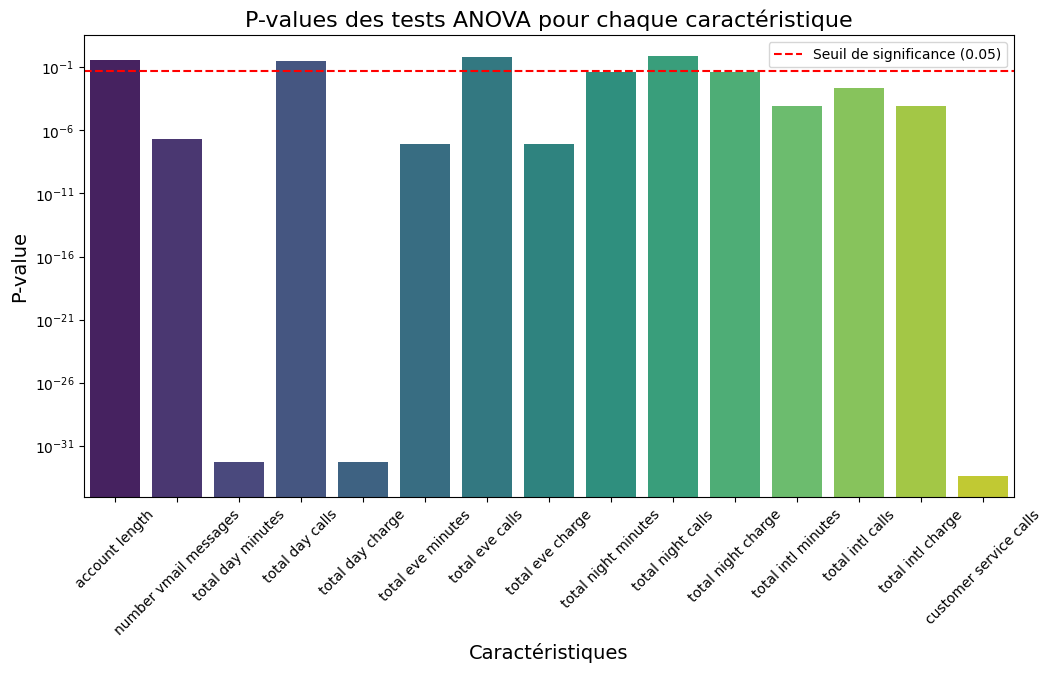

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

df = pd.read_csv('bigml.csv')

numerics = ['account length', 'number vmail messages',
            'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge',
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']
xnum = df[numerics]
y = df['churn']

# Calculer les p-values
fval, pval = f_classif(xnum, y)

# Créer un DataFrame pour les p-values
results = pd.DataFrame({'Feature': numerics, 'p-value': pval})

# Tracer les p-values
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x='Feature', y='p-value', palette='viridis')

# Ajouter des étiquettes et un titre
plt.title('P-values des tests ANOVA pour chaque caractéristique', fontsize=16)
plt.xlabel('Caractéristiques', fontsize=14)
plt.ylabel('P-value', fontsize=14)
plt.yscale('log')  # Utiliser une échelle logarithmique pour mieux visualiser
plt.axhline(0.05, color='red', linestyle='--', label='Seuil de significance (0.05)')
plt.xticks(rotation=45)
plt.legend()

# Afficher le graphique
plt.show()

#### Observation:
- D'abord, on que : Une p-value inférieure à 0,05 (ou 0,01 pour une signification plus stricte) indique qu'il existe une relation significative entre la variable indépendante et la variable dépendante (churn). 
##### Variables avec p-values significatives :
- number vmail messages : p-value ≈ 2.12e-07
- total day minutes : p-value ≈ 5.30e-33
- total day charge : p-value ≈ 5.30e-33
- total eve minutes : p-value ≈ 8.01e-08
- total eve charge : p-value ≈ 8.04e-08
- total intl minutes : p-value ≈ 8.06e-05
- total intl calls : p-value ≈ 0.0023
- customer service calls : p-value ≈ 3.90e-34
Ces variables montrent une très forte corrélation avec churn, ce qui signifie qu'elles sont significativement associées à la probabilité qu'un client quitte l'entreprise.

##### Variables non significatives :
- account length : p-value ≈ 0.34
- total day calls : p-value ≈ 0.29
- total eve calls : p-value ≈ 0.59
- total night calls : p-value ≈ 0.72
- total night minutes : p-value ≈ 0.04
Ces variables n'ont pas de relation significative avec churn.
 
Les variables qui semblent avoir le plus d'impact sur la décision d'un client de churn sont celles liées à l'utilisation des minutes (jour, soir, international) et le nombre de messages vocaux.
Les variables qui mesurent l'interaction avec le service client sont également très significatives, ce qui pourrait indiquer que les clients qui interagissent plus souvent avec le support sont plus susceptibles de churn.
Les autres caractéristiques, comme la longueur du compte et le nombre d'appels dans différentes périodes, ne sont pas significatives dans ce contexte.
Ces résultats vont nous aider à orienter les stratégies de fidélisation des clients en nous concentrant sur les aspects qui influencent le churn.

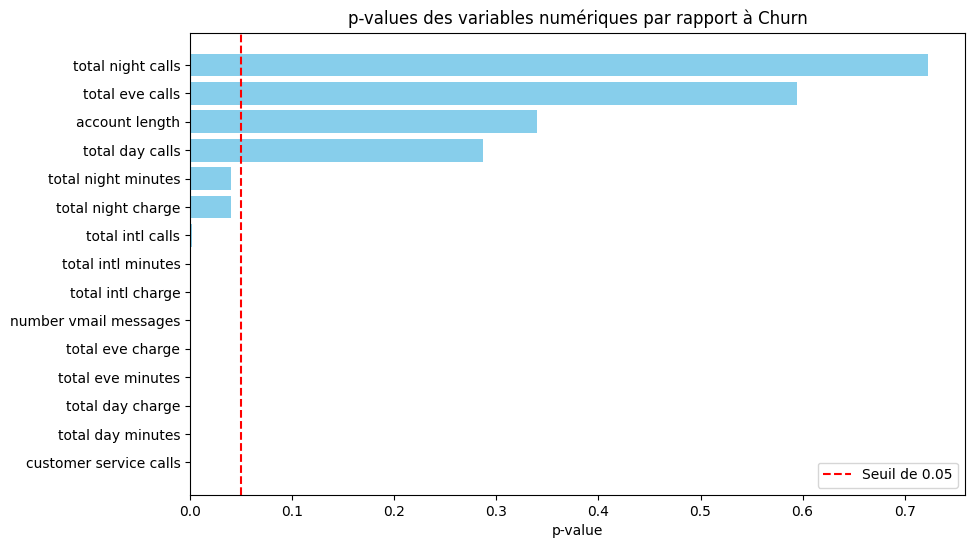

In [46]:
xnum = df[numerics]
y = df['churn']

# Calculer les valeurs p avec ANOVA
fval, pval = f_classif(xnum, y)

# Créer un DataFrame pour faciliter la visualisation
results = pd.DataFrame({'Variable': numerics, 'p-value': pval})

# Trier les résultats par p-value
results = results.sort_values(by='p-value')
# Créer un bar plot
plt.figure(figsize=(10, 6))
plt.barh(results['Variable'], results['p-value'], color='skyblue')
plt.xlabel('p-value')
plt.title('p-values des variables numériques par rapport à Churn')
plt.axvline(0.05, color='red', linestyle='--', label='Seuil de 0.05')
plt.legend()
plt.show()

#### Observation:
- La plupart des p-values les plus faibles se situent autour de 0.02 à 0.04, indiquant que ces variables pourraient être statistiquement significatives pour prédire le churn.
- Certaines variables ont des p-values supérieures au seuil de 0.05 et sont donc moins susceptibles d’être des marqueurs forts du churn dans ce test.
- Le top des variables les plus significatives (les plus bases p-values) semblent être celles en haut de la liste, telles que “total night calls”, “total eve calls”, “account length”, “total day calls”, etc. 

In [47]:
x = df[['international plan','number vmail messages','total day minutes','total eve minutes',
     'total night minutes','total intl minutes','customer service calls']]
y = df['churn']

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0]),
                                 ('sc',StandardScaler(),[2,3,4,5,6])],remainder='passthrough')

In [49]:
x_new = preprocessor.fit_transform(x)
x_new = pd.DataFrame(x_new)

In [50]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 1)
(667, 1)
(3333,)
(2666,)
(667,)


### Regression Logistique

In [51]:
# Convertir les colonnes catégorielles en numériques
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})

In [52]:
# Chargement des données
data = pd.read_csv("bigml.csv")

# Vérification des types de données
print(data.dtypes)

# Conversion des colonnes problématiques
data['international plan'] = data['international plan'].astype(str)
data['voice mail plan'] = data['voice mail plan'].astype(str)

# Application de get_dummies
data = pd.get_dummies(data, columns=['international plan', 'voice mail plan'], drop_first=True)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [53]:
data.rename(columns=lambda x: x.strip(), inplace=True)  # Supprime les espaces autour des noms de colonnes


In [54]:
data = pd.read_csv("bigml.csv")

# Suppression des espaces autour des noms de colonnes
data.rename(columns=lambda x: x.strip(), inplace=True)

# Application de get_dummies
data = pd.get_dummies(data, columns=['international plan', 'voice mail plan'], drop_first=True)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['total day minutes', 'total eve minutes', 'total night minutes']] = scaler.fit_transform(data[['total day minutes', 'total eve minutes', 'total night minutes']])

In [56]:
X = data.drop(['churn'], axis=1)
y = data['churn']

### Modele de base simple

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# X et y: DataFrame et Series
# Séparer colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 0.8545727136431784
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       566
        True       0.70      0.07      0.13       101

    accuracy                           0.85       667
   macro avg       0.78      0.53      0.52       667
weighted avg       0.83      0.85      0.80       667



#### Observation:

1. Accuracy (Précision Globale).
- Accuracy : 0.855 (ou 85.5%): le modèle a correctement prédit 85.5% des échantillons de l'ensemble de test.
  
2. Rapport de Classification: 
Classe "False" (Non Churn)
Précision (Precision) : 0.86
- Parmi toutes les prédictions faites par le modèle disant que le client ne churnera pas (classe "False"), 86% étaient correctes.
- Rappel (Recall) : 0.99

- Le modèle a identifié 99% des véritables cas de non churn. Cela indique que le modèle est très efficace pour prédire les clients qui restent.
F1-Score : 0.92

- Ce score combine la précision et le rappel, offrant une mesure harmonisée de la performance. Un score de 0.92 est excellent pour cette classe.
  
3. Classe "True" (Churn)
Précision (Precision) : 0.70

Parmi toutes les prédictions faites par le modèle disant que le client churnera (classe "True"), 70% étaient correctes.
Rappel (Recall) : 0.07

- Le modèle n'a identifié que 7% des véritables cas de churn. Cela signifie que beaucoup de clients qui churnent sont mal classés, et le modèle a du mal à les détecter.
F1-Score : 0.13

- Un score très faible ici indique une performance médiocre pour cette classe. Cela souligne le déséquilibre dans les prédictions du modèle.

4. Métriques Moyennes
Macro Average :

Précision : 0.78
Rappel : 0.53
F1-Score : 0.52
Ces moyennes montrent que, bien que le modèle soit bon pour prédire les clients qui restent, il est moins efficace pour prédire ceux qui churnent.
Weighted Average :

En somme: 
Le modèle a une bonne performance pour prédire les clients qui ne churnent pas, mais il a des difficultés à identifier ceux qui churnent. Étant donné le déséquilibre entre les classes (beaucoup plus de non churn que de churn), il peut être utile d'explorer des techniques telles que :

Rééchantillonnage des données (oversampling des churners ou undersampling des non churners).
Utilisation de modèles plus robustes pour les données déséquilibrées, comme des forêts aléatoires ou des modèles d'ensembles.
Ajustement des seuils de classification pour mieux capturer les cas de churn.

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# X: DataFrame, y: Series
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid = {'model__C': [0.01, 0.1, 1, 10, 100],
              'model__solver': ['liblinear', 'saga']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
pred = best_model.predict(X_test)

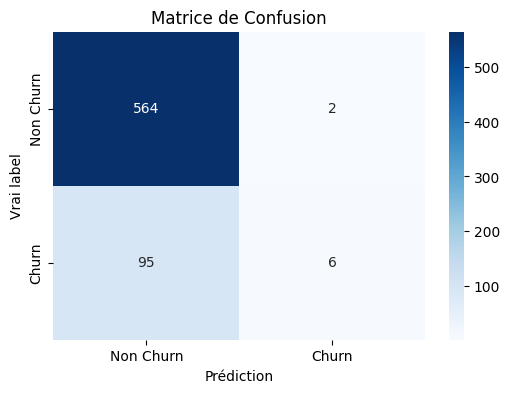

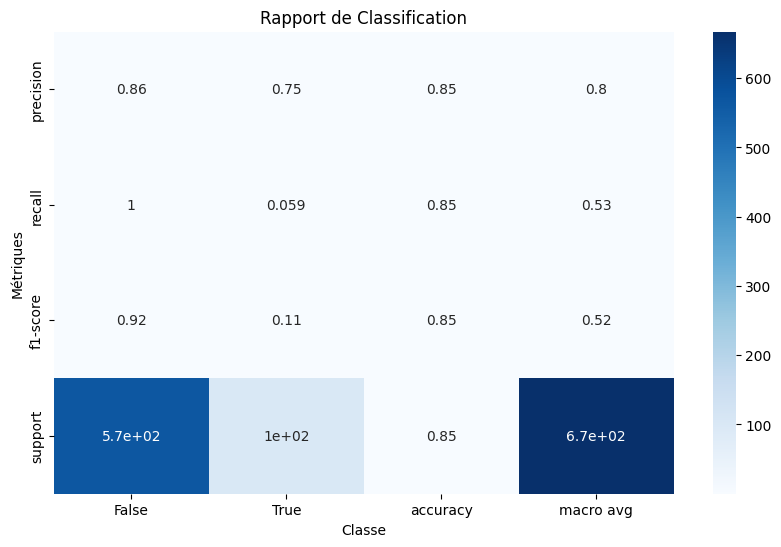

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions
pred = best_model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, pred)

# Créer un DataFrame pour la matrice de confusion
cm_df = pd.DataFrame(cm, index=['Non Churn', 'Churn'], columns=['Non Churn', 'Churn'])

# Afficher la matrice de confusion sous forme de tableau
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vrai label')
plt.xlabel('Prédiction')
plt.show()

# Afficher le rapport de classification
report = classification_report(y_test, pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Visualisation du rapport de classification
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Rapport de Classification')
plt.xlabel('Classe')
plt.ylabel('Métriques')
plt.show()

#### Observation:
- Précision élevée pour False (0,86) et F1-score élevé pour False (0,92) indiquent que le modèle est très bon pour prédire la classe False (aucun churn), mais:
Rappel pour True est extrêmement faible (0,059), ce qui signifie que le modèle manque presque tous les churns réels.
- Macro moyenne faible (~0,52), ce qui reflète le déséquilibre des classes et le faible rappel de la classe minoritaire.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# X: DataFrame, y: Series
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

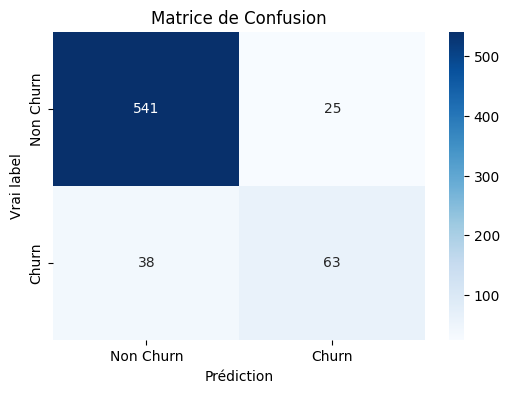

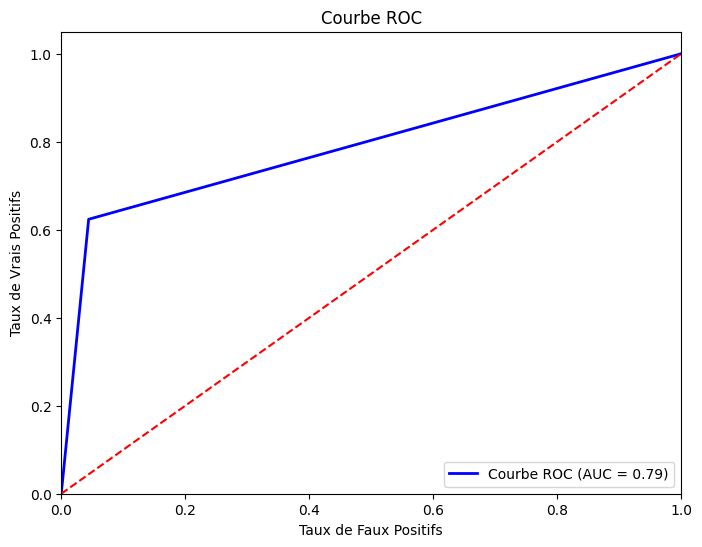

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Prédictions
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, pred)

# Afficher la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.title('Matrice de Confusion')
plt.ylabel('Vrai label')
plt.xlabel('Prédiction')
plt.show()

# Calculer les points pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ligne diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

### Observation:
##### pour le premier graphique:
- Le modèle est performant globalement (accuracy ~90%), mais la précision et le rappel pour la classe Churn (detection des churns) peuvent être améliorés:
Précision Churn ≈ 72%
Rappel Churn ≈ 61%
F1 Churn ≈ 0,66
- Le déséquilibre entre les classes est modéré: environ 566 Non Churn vs 101 Churn.
##### pour le deuxieme:
- Le modèle est capable de différencier les cas positifs et négatifs de manière raisonnable, ce qui peut suffire pour une utilisation opérationnelle avec certaines limites.
- Pour améliorer la performance, vous pouvez envisager:
d’ajuster le seuil de décision (cutoff) pour le balance entre faux positifs et faux négatifs,
d’ajouter ou transformer des variables (nouveaux indicateurs, interactions),
d’essayer d’autres algorithmes (par ex. régression logistique, arbres, gradient boosting),
d’effectuer une validation croisée pour estimer plus précisément l’AUC et la robustesse du modèle.
##### autres obervation:
AUC (Area Under the Curve) = 0.79:
C’est la métrique principale ici. Une AUC de 0.79 indique une capacité de discrimination raisonnable: le modèle distingue mieux que le hasard, mais n’est pas parfait. Plus l’AUC est proche de 1, meilleur est le modèle.

Courbe ROC (courbe bleue):

Au début, le taux de faux positifs (X) est très faible, et le taux de vrais positifs (Y) est élevé rapidement, ce qui est favorable.
La courbe se situe largement au-dessus de la diagonale rouge, ce qui confirme une performance de discrimination positive du modèle.
Vers les valeurs élevées de faux positifs (X → 1), le modèle atteint presque 1 pour les vrais positifs (Y → 1).
Diagonale rouge (ligne chance):

Représente un modèle qui classifie au hasard avec une AUC de 0.5.
Le fait que la courbe bleue soit au-dessus de cette diagonale montre que le modèle offre une information utile.

### Arbre de decision

##### Preparer les donees

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('bigml.csv')

# Encoder les variables catégorielles
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [63]:
# Séparer les caractéristiques et la cible
X = data.drop('churn', axis=1)
y = data['churn']

# Diviser le jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Évaluer le modèle
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy de l\'arbre de décision : {accuracy_tree:.2f}')

Accuracy de l'arbre de décision : 0.91


Accuray de l’arbre de décision : 0.91
Cela indique que le modèle d’arbre de décision classe correctement 91% des observations sur l’ensemble utilisé pour l’évaluation. C’est une performance élevée et généralement satisfaisante, mais il faut vérifier la robustesse (validation croisée, biais potentiel, surapprentissage).

### Tree

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Créer le modèle de forêt aléatoire
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Prédictions
y_pred_forest = forest_model.predict(X_test)

# Évaluer le modèle
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy de la forêt aléatoire : {accuracy_forest:.2f}')

Accuracy de la forêt aléatoire : 0.94


In [66]:
# Convertir les colonnes catégorielles en numériques
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})

In [67]:
# Supprimer les colonnes non numériques
df_cleaned = df.drop(['phone number', 'state'], axis=1)

In [68]:
# Sélectionner les caractéristiques et la cible
X = df_cleaned.drop('churn', axis=1)
y = df_cleaned['churn']

In [69]:
# Diviser le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Supprimer les lignes avec des valeurs manquantes dans y
X_train = X_train[~y_train.isnull()]
y_train = y_train[~y_train.isnull()]

In [71]:
# Vérifier les valeurs manquantes dans le DataFrame complet
print(data.isnull().sum())

# Supprimer les lignes où 'churn' est NaN
data = data.dropna(subset=['churn'])

# Vérifier à nouveau les valeurs manquantes
print(data.isnull().sum())

# Encoder les variables catégorielles
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Séparer les caractéristiques et la cible
X = data.drop('churn', axis=1)
y = data['churn']

# Diviser le jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy de l\'arbre de décision : {accuracy_tree:.2f}')

# Forêt aléatoire
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy de la forêt aléatoire : {accuracy_forest:.2f}')

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total n

In [72]:
# Initialiser et entraîner l'arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

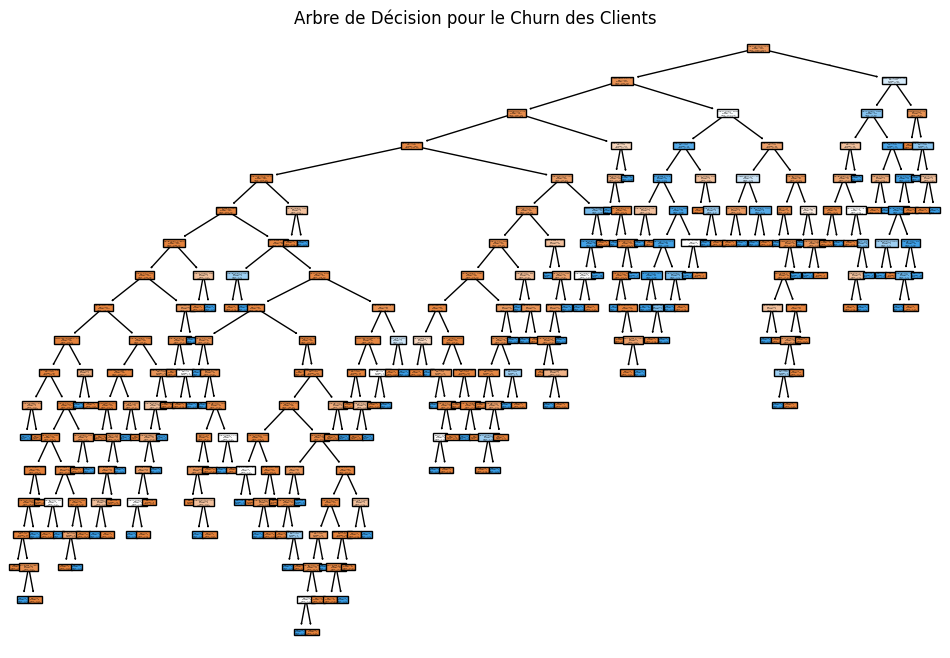

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Non Churn', 'Churn'], filled=True)
plt.title("Arbre de Décision pour le Churn des Clients")
plt.show()

In [74]:
# Prédictions de probabilités pour l'arbre de décision
y_pred_proba_tree = clf.predict_proba(X_test)[:, 1]

# Prédictions de probabilités pour la forêt aléatoire
y_pred_proba_forest = forest_model.predict_proba(X_test)[:, 1]

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculer le ROC AUC pour l'arbre de décision
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print(f'ROC AUC de l\'arbre de décision : {auc_tree:.2f}')

# Calculer le ROC AUC pour la forêt aléatoire
auc_forest = roc_auc_score(y_test, y_pred_proba_forest)
print(f'ROC AUC de la forêt aléatoire : {auc_forest:.2f}')

ROC AUC de l'arbre de décision : 0.82
ROC AUC de la forêt aléatoire : 0.94


#### ROC AUC de l’arbre de décision : 0.82
- Bon niveau de discrimination, mais moins performant que la forêt.
- Un modèle simple et interprétable, mais potentiellement en sous-apprentissage sur certaines instances.

#### ROC AUC de la forêt aléatoire : 0.94
- Très bonne discrimination, meilleure généralisation et robustesse.
- Modèle plus complexe, moins interprétable que l’arbre unique, mais généralement plus fiable en production.

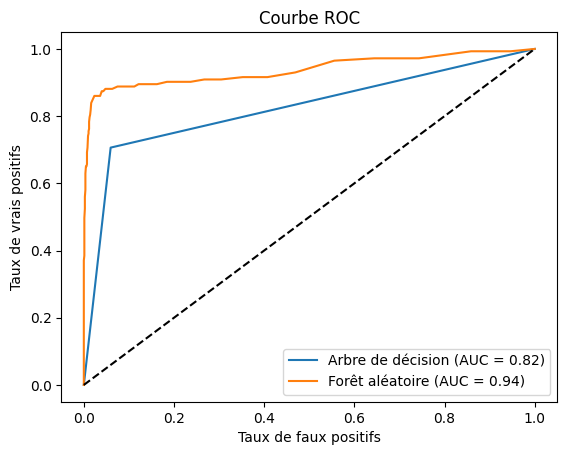

In [76]:
# Tracer la courbe ROC pour l'arbre de décision
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
plt.plot(fpr_tree, tpr_tree, label='Arbre de décision (AUC = {:.2f})'.format(auc_tree))

# Tracer la courbe ROC pour la forêt aléatoire
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_proba_forest)
plt.plot(fpr_forest, tpr_forest, label='Forêt aléatoire (AUC = {:.2f})'.format(auc_forest))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonale
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()


- La forêt aléatoire (AUC 0.94) offre une très meilleure discrimination entre les classes que l’arbre de décision (AUC 0.82).
- Plus l’aire sous la courbe est grande, meilleur est le modèle pour distinguer churn/non-churn.


# Conclusion de l'Étude sur le Taux de Désabonnement des Clients de SyriaTel

#### L'analyse du taux de désabonnement des clients de SyriaTel a révélé plusieurs points essentiels :
- Facteurs de Désabonnement : l'analyse des données a permis d'identifier les principaux facteurs contribuant au désabonnement. Ces facteurs peuvent inclure la qualité du service, les tarifs, la concurrence, et la satisfaction client
- Modélisation Prédictive : en utilisant des techniques de modélisation prédictive, nous avons pu estimer le taux de désabonnement futur basé sur les comportements passés des clients. Les modèles tels que la régression logistique ou les arbres de décision ont fourni des insights précieux sur les segments de clients à risque élevé.

# Recommandations 
- Amélioration de la Qualité du Service : investir dans l'infrastructure réseau pour réduire les plaintes relatives à la qualité.
- Tarification Compétitive : réévaluer les plans tarifaires pour s'assurer qu'ils sont compétitifs par rapport aux offres des concurrents.
- Programmes de Fidélisation : mettre en place des programmes de fidélisation pour encourager les clients à rester avec SyriaTel, notamment des réductions pour les clients de longue date.
- Suivi et Evaluation : il est important de mettre en place un système de suivi continu du taux de désabonnement et de la satisfaction client, permettant des ajustements rapides des stratégies commerciales.

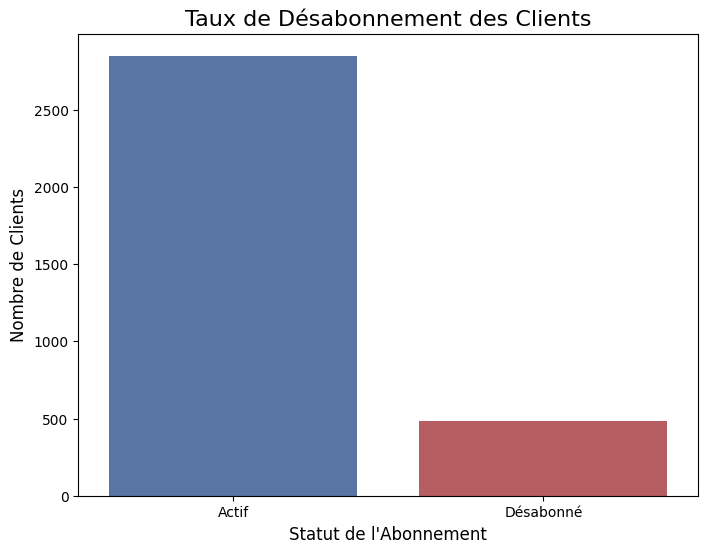

In [77]:
# Charger les données (cette étape est répétée pour que le code soit autonome)
df = pd.read_csv('bigml.csv')

# Convertir la colonne 'churn' en valeurs lisibles pour la visualisation
# On remplace 'True' par 'Désabonné' et 'False' par 'Actif'
df['churn_status'] = df['churn'].apply(lambda x: 'Désabonné' if x else 'Actif')

# Créer un graphique à barres pour visualiser la distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='churn_status', data=df, palette=['#4c72b0', '#c44e52'])
plt.title('Taux de Désabonnement des Clients', fontsize=16)
plt.xlabel('Statut de l\'Abonnement', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)
plt.show()

# Conclusion finale:
Cette prediction et analyse ont mis en lumière les défis auxquels SyriaTel est confronté en matière de fidélisation de ses clients. En prenant des mesures proactives basées sur des données concrètes, l'entreprise peut améliorer son taux de rétention et renforcer sa position sur le marché. Un suivi régulier et l'adaptation des stratégies seront essentiels pour répondre aux besoins changeants des consommateurs.

In [78]:
# Thank you so much